# Advertising Sales Channel Prediction

##### Problem Statement:

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

##### Importing Libraries

In [2]:
import pandas  as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing the Dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df.head(5)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 5)

In the above dataset, there are 5 columns which contains features and one target variable which is "sales". As the target variable contains continuous data so it is a regression type problem.

Column 'Unnamed' is taken on the basis of index purpose, so it has no relation with our target variable. On this basis we will remove this column.

In [5]:
# Dropping the irrelevant column Unnamed:0
df.drop("Unnamed: 0",axis=1, inplace=True)

In [6]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


This is the dataframe after removing the column Unnamed:0 and showing the first five rows of the dataset.

# Exploratory Data Analysis (EDA)

In [7]:
# Checking the dimension of the dataset
df.shape

(200, 4)

In [8]:
# To get overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


From above, we can see that the 3 feature column along with the target column are all of the same data type float making it easier for us to go through further data pre processing steps.

In [9]:
# Checking number of unique values in all the columns 
df.nunique()

TV           190
radio        167
newspaper    172
sales        121
dtype: int64

In [10]:
# Checking count of null values from the dataset.
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

From above, we can see that there are no missing values in the dataset.

<AxesSubplot:>

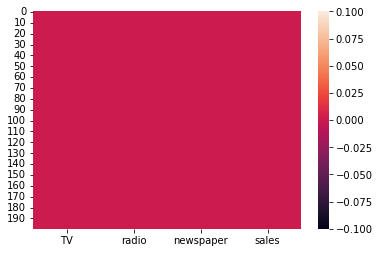

In [11]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull())

In [12]:
# Statistical summary of dataset
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present.

In the above description, newspaper column shows a huge gap between it's 75% quantile to it's maximum value while the other two feature columns show reasonable increase between each of their quantiles.

# Data Visualisation

## Bivariate Analysis

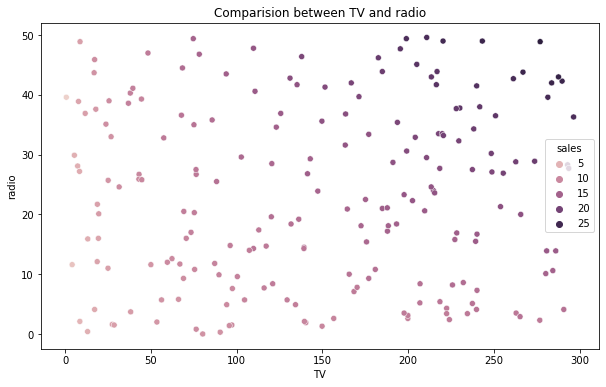

In [13]:
# Checking the relation between TV and radio on the basis of sales
plt.figure(figsize=[10,6])
plt.title('Comparision between TV and radio')
sns.scatterplot(df['TV'],df['radio'],hue=df["sales"]);

Here we can see the data is scattered so there is no linear relationship while comparing TV and radio. As we can see from the plot, if we spend more money then we can see the increment in the sales.

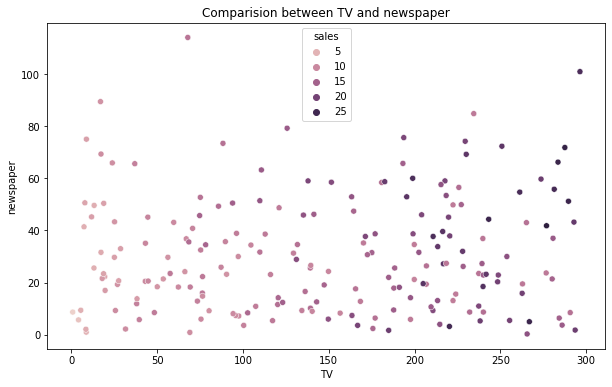

In [14]:
# Checking the relation between TV and newspaper on the basis of sales
plt.figure(figsize=[10,6])
plt.title('Comparision between TV and newspaper')
sns.scatterplot(df['TV'],df['newspaper'],hue=df["sales"]);

By comparing TV and newpaper we can say there is no linearity between them and we can also notice less sales in newspaper channel and the sales increased as the money increases in the TV channel. Also investing more money increases the sales. There are some outliers present, we will identify them by box plot later.

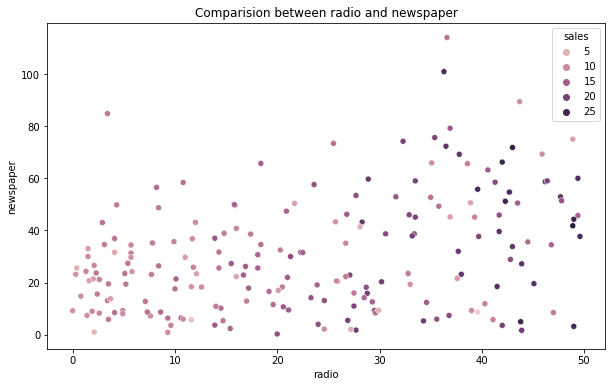

In [15]:
# Checking the relation between radio and newspaper on the basis of sales
plt.figure(figsize=[10,6])
plt.title('Comparision between radio and newspaper')
sns.scatterplot(df['radio'],df['newspaper'],hue=df["sales"]);

Here also there is no linear relationship between these features. Also we can witness some outliers present here.

From the above plots we can notice, if we invest more money then we get more sales in all the platforms.

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

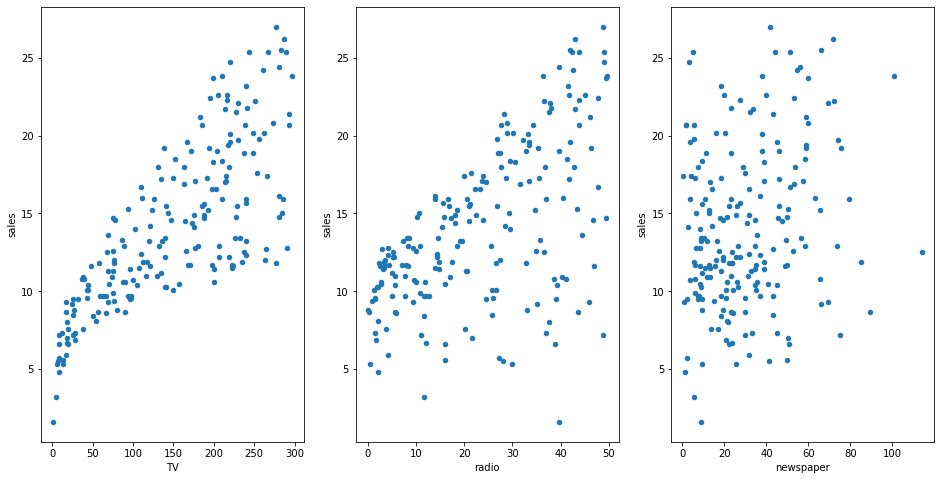

In [16]:
# Visualizing the relationship between the features and the label 
fig, axs = plt.subplots(1,3)

df.plot(x = "TV", y = "sales", kind = "scatter", ax=axs[0], figsize = (16,8))
df.plot(x = "radio", y = "sales", kind = "scatter", ax=axs[1])
df.plot(x = "newspaper", y = "sales", kind = "scatter", ax=axs[2])

From the above graphs, it can be observed that there seems to be a linear relationship between the features TV, Radio with the sales.

TV vs sales, we can notice the linear relation between TV and sales. This means if we increase our investment in advertising the product on TV then there is an improvemnt in our sales. Which means there is a positive linear relationship.

Radio vs sales, here also we can observe the linear relationship between radio and sales. This means if we invest in advertising the product on radio then also we can get a profit in our sales but not more as TV, But there is no loss in advertising on radio.

Newspaper vs sales, in case of newspaper there is no relationship with sales which means advertising the product on newspaper will not improve our sales also we get more loss by investing money on newspaper. So we can say may be newspaper is not the best platform to invest the money. But we cannot conclude on this basis, will move further and analyze it.

## Multivariate Analysis

<Figure size 1080x720 with 0 Axes>

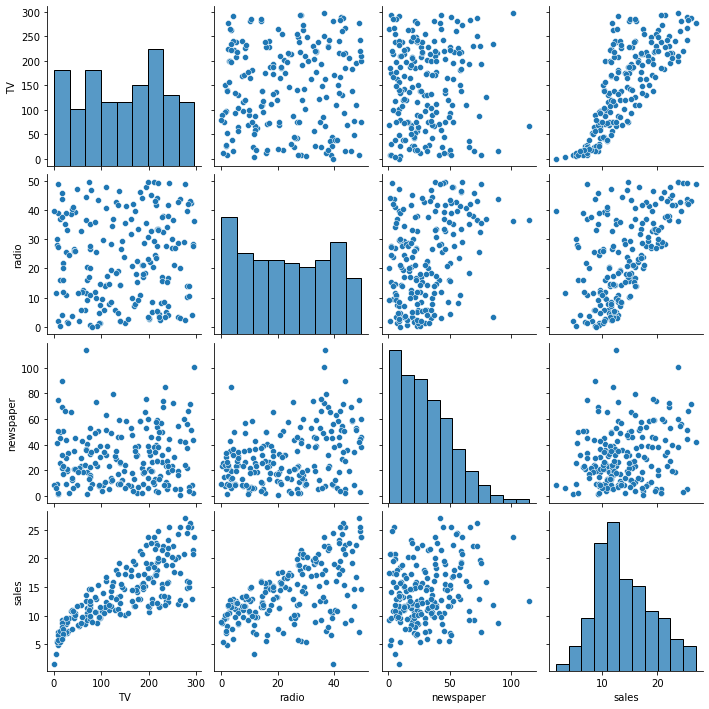

In [17]:
# Checking the pairwise relation in the dataset.

plt.figure(figsize=(15,10))
sns.pairplot(df)
plt.show()

With the help of above pairplot we can see that TV and Radio columns have a linear relationship with Sales. However the Newspaper column is too scattered and we can see an increase with respect to sales but their is no definite linear pattern into it.

# Correlation using HEAT map

In [18]:
cor = df.corr()
cor

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


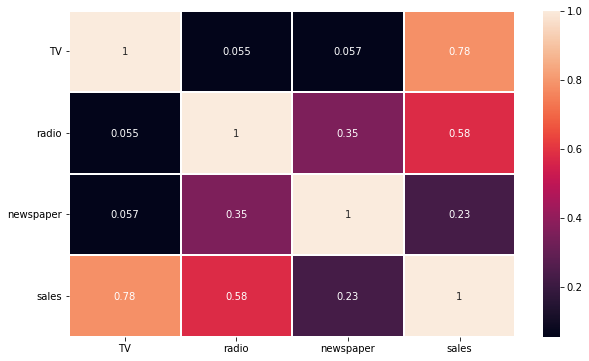

In [19]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),linewidths=.1, annot = True)
plt.yticks(rotation=0);

From above heatmap, we can see that there are no negative correlation present in between our features and label or between the feature columns either. Noticing the sales part we see that it has a high correlation with TV and a low correlation with Newspaper.

We can also see there is no high correlation between feature to feature which means there is no multicollinearity problem.

In [20]:
cor['sales'].sort_values(ascending=False)

sales        1.000000
TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64

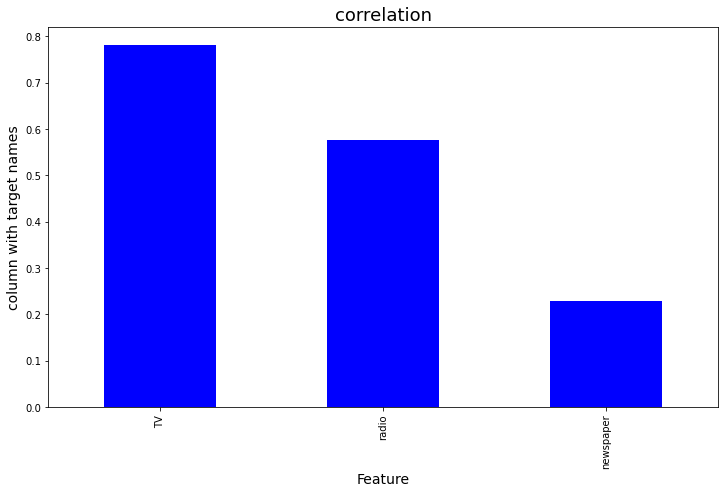

In [22]:
#Visualizing the correlation between label and features using bar plot

plt.figure(figsize=(12,7))
df.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar',color='b')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

# Outliers

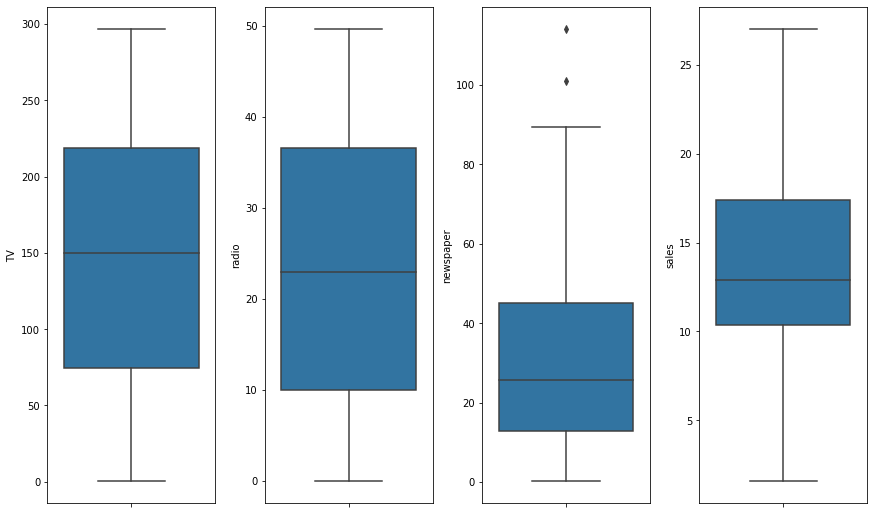

In [24]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(12,7))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.2, w_pad=0.9, h_pad=5.0)
plt.show()

The above boxplot shows that only the newspaper column has 2 outliers. Let's remove those outliers.

### Removing outliers using Zscore



In [25]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [7]:
variables = df[["newspaper"]]

In [8]:
# Using zscore to remove outliers in the feature newpaper
from scipy.stats import zscore

z=np.abs(zscore(variables))

# Creating new dataframe
new_df=df[(z<3).all(axis=1)]
new_df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


This is the new dataframe after removing the outliers.

In [28]:
df.shape

(200, 4)

In [29]:
new_df.shape

(198, 4)

In [30]:
# Let's check the the data loss
data_loss = (200-198)/200*100
data_loss

1.0

# Skewness

In [31]:
# Checking the skewness
new_df.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

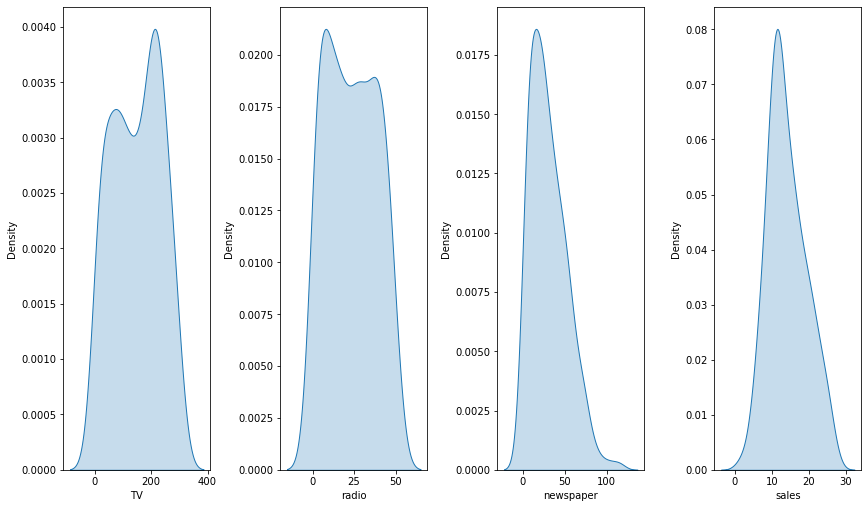

In [32]:
# Distribution plot to visualise the skewness

fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(12,7))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

Skewness threshold is taken as +/- 0.65.

Only newspaper has skewness, let's remove the skewness.

### Removing Skewness using yeo-johnson method

In [33]:
feature = ["newspaper"]

In [34]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [35]:
new_df[feature] = scaler.fit_transform(new_df[feature].values)
new_df[feature]

,newspaper
0,1.604196
1,0.831044
2,1.607052
3,1.283768
4,1.280622
...,...
195,-0.687435
196,-1.146090
197,-1.314437
198,1.517395


In [36]:
# Now let's check the skewness after applying yeo-johnson method.
new_df.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.101288
sales        0.407130
dtype: float64

We can see the skewness has been removed. Now let's visualize it by using distplot.

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

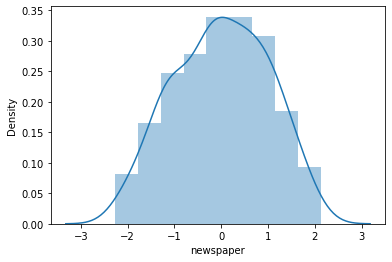

In [37]:
# After removing let's check how the data has been distributed in each column.

sns.distplot(new_df["newspaper"])

Now the feature newpaper looks normally distributed and has no skewness.

# Data preprocessing

#### Separating the independent and target variables into x and y

In [9]:
x = new_df.drop("sales", axis=1)
y = new_df["sales"]

In [39]:
# dataset containing only features
x

,TV,radio,newspaper
0,230.1,37.8,1.604196
1,44.5,39.3,0.831044
2,17.2,45.9,1.607052
3,151.5,41.3,1.283768
4,180.8,10.8,1.280622
...,...,...,...
195,38.2,3.7,-0.687435
196,94.2,4.9,-1.146090
197,177.0,9.3,-1.314437
198,283.6,42.0,1.517395


#### Scaling data with standard scaler

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,TV,radio,newspaper
0,0.978697,0.989521,1.932998
1,-1.199012,1.090705,0.751313
2,-1.519332,1.535913,1.937901
3,0.056456,1.225616,1.408349
4,0.400243,-0.831784,1.403446
...,...,...,...
193,-1.272932,-1.310720,-0.783407
194,-0.615864,-1.229773,-1.062892
195,0.355657,-0.932968,-1.146248
196,1.606431,1.272836,1.785900


This is our scaled data using standard scaler.

# Modeling

### Finding best random state

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [12]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Maximum r2 score is ",maxAccu,"on Random_state ",maxRS)

Maximum r2 score is  0.9373215416328826 on Random_state  90


So, here we are getting the maximum r2 score as 93.73% on the random state 90.

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

As we have to predict the sales thus it is a continious value , so we have to can understand by this that these problem is a Regression problem

##### Importing all the Regression Algorithms

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

## Linear Regression

In [15]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))
print('Mean abs error:',mean_absolute_error(y_test, predLR))
print('Mean squared error:',mean_squared_error(y_test, predLR))

R2_score: 0.9373215416328826
Mean abs error: 1.0110846135974134
Mean squared error: 1.5430259487821643


### Random Forest Regressor

In [16]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('Mean abs error:',mean_absolute_error(y_test, predRFR))
print('Mean squared error:',mean_squared_error(y_test, predRFR))

R2_Score: 0.9740366827779537
Mean abs error: 0.639349999999997
Mean squared error: 0.639168116666663


### Decision Tree Regressor

In [17]:
# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
print('R2_Score:',r2_score(y_test,predDTR))
print('Mean abs error:',mean_absolute_error(y_test, predDTR))
print('Mean squared error:',mean_squared_error(y_test, predDTR))

R2_Score: 0.9652491773223971
Mean abs error: 0.7183333333333333
Mean squared error: 0.8554999999999993


### KNN Regressor

In [18]:
# Checking R2 score for KNN regressor
knn=KNN()
knn.fit(x_train,y_train)

#prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('Mean abs error:',mean_absolute_error(y_test, predknn))
print('Mean squared error:',mean_squared_error(y_test, predknn))

R2_Score: 0.9373391146810999
Mean abs error: 0.8303333333333333
Mean squared error: 1.542593333333333


### Support Vector Regressor

In [19]:
# Checking R2 score for KNN regressor
svr=SVR()
svr.fit(x_train,y_train)

#prediction
predsvr=svr.predict(x_test)
print('R2_Score:',r2_score(y_test,predsvr))
print('Mean abs error:',mean_absolute_error(y_test, predsvr))
print('Mean squared error:',mean_squared_error(y_test, predsvr))

R2_Score: 0.9331889054741771
Mean abs error: 0.8113774680249423
Mean squared error: 1.6447636908371488


### Stochastic Gradient Descent Regressor

In [20]:
# Checking R2 score for SGD Regressor
SGD=SGDRegressor()
SGD.fit(x_train,y_train)

#prediction
predSGD=SGD.predict(x_test)
print('R2_Score:',r2_score(y_test,predSGD))
print('Mean abs error:',mean_absolute_error(y_test, predSGD))
print('Mean squared error:',mean_squared_error(y_test, predSGD))

R2_Score: 0.9362745276272896
Mean abs error: 1.0269972504022173
Mean squared error: 1.56880146754023


## Checking the cross validation score

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
# Checking cv score for Linear Regression
print('The CV score  for Linear_regression is :',cross_val_score(LR,x,y,cv=5).mean())

The CV score  for Linear_regression is : 0.885360575668391


In [23]:
# Checking cv score for Random Forest Regression
print("The CV  score for  the Random forest regressor is:",cross_val_score(RFR,x,y,cv=5).mean())

The CV  score for  the Random forest regressor is: 0.9748026790197489


In [24]:
# Checking cv score for Decision Tree Regression
print('The CV score  for  the Decision Tree Regression is :',cross_val_score(DTR,x,y,cv=5).mean())

The CV score  for  the Decision Tree Regression is : 0.9527087601671573


In [25]:
# Checking cv score for KNN Regression
print('The CV score  for  the KNN regressor is :',cross_val_score(knn,x,y,cv=5).mean())

The CV score  for  the KNN regressor is : 0.9367560788064591


In [26]:
# Checking cv score for SVR Regression
print('The CV score  for  the SVR regressor is :',cross_val_score(svr,x,y,cv=5).mean())

The CV score  for  the SVR regressor is : 0.9105355050541174


In [27]:
# Checking cv score for SGD Regression
print('The  CV score for the SGD  regressor is :',cross_val_score(SGD,x,y,cv=5).mean())

The  CV score for the SGD  regressor is : 0.8859627531353371


From the above observation, looking at the R2 score and the cross validation score we conclude that Random Forest Regressor is our best fitting model

In [28]:
score= pd.DataFrame({'CV_RFR':0.9748026790197489, 'R2_score_RFR':0.9740366827779537}, index=['0'])

In [29]:
score

,CV_RFR,R2_score_RFR
0,0.974803,0.974037


so we can see that after using the CV on random forest our model is working lttle better then earlier and got a very good score of 97%

## Hyperparameter tuning

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
#RandomForestRegressor
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,400],
             'max_depth':[2,4,6]}

In [32]:
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [33]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 400]})

In [34]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 400}

In [57]:
Adv_sales = RandomForestRegressor(criterion='mse', max_depth=6, max_features='auto', n_estimators=400)
Adv_sales.fit(x_train, y_train)
pred_GCV = Adv_sales.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_GCV)*100)

R2_Score: 97.23689905438968


After tuning the model Random Forest Regressor, we are getting R2 score as 97% which is good.

# Saving the model

In [58]:
# Saving the model using .pkl
import joblib
joblib.dump(Adv_sales,"Adv_Sales_Channel.pkl")

['Adv_Sales_Channel.pkl']